# Explore here

In [2]:
import numpy as np, random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


1- EPLORACION DE DATOS: A)EXTRACCION DE DATOS, B) CATEGORIZACION DE DATOS C)LIMPIEZA DE DATOS.


In [3]:
#1.A) Obtener dataframe de datos a partir del csv.
#https://docs.python.org/3/library/csv.html csv related.
#rawdata as rd
rd= "https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv" 
#dataframe rawdata as df_rd
df_rd = pd.read_csv(rd)
df_rd.to_csv('/workspaces/EDA_ML.LogisticRegresion/data/raw/df_rd.csv')



In [4]:
#1.B) CATEGORIZACION DE DATOS.
#INFO y Head para ver tipos de variables. Tambien con la extension "DataWrangler podemos ver archivos csv y dataframes"
df_rd.head(3)

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"56;""housemaid"";""married"";""basic.4y"";""no"";""no"";..."
1,"57;""services"";""married"";""high.school"";""unknown..."
2,"37;""services"";""married"";""high.school"";""no"";""ye..."


In [5]:
#1.B) El dataframe no tiene el formato deseado , observamos que los identificadores de columna estan separados por puntos y coma,
#filtramos el csv raw para darle formato y sobreescribimos nuestro dataframe
df_rd = pd.read_csv(rd, sep=";")
df_rd.to_csv('/workspaces/EDA_ML.LogisticRegresion/data/raw/df_rd.csv')
df_rd.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
#1.B) ClassDatos
#Utilizamos una función para separar variables numericas y categoricas en un dataframe.
import pandas as pd
import numpy as np
import pandas as pd
#VOY A CAMBIAR EL NOMBRE A LA VARIABLE TARGET POR DEPOSIT
df_rd = df_rd.rename(columns={'y': 'deposit'})
def vartype(df):


    num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    cat_cols = df.select_dtypes(include=['object']).columns.tolist()

    
    df_tipos = pd.DataFrame({'Tipo': ['Numérica']*len(num_cols) + ['Categórica']*len(cat_cols),
                            'Columna': num_cols + cat_cols})
    total_num = len(num_cols)
    total_cat = len(cat_cols)
    total_general = total_num + total_cat
    # Crear una lista de diccionarios para las nuevas filas
    new_rows = [
        {'Tipo': 'Total Numérico', 'Columna': total_num},
        {'Tipo': 'Total Categórico', 'Columna': total_cat},
        {'Tipo': 'Total General', 'Columna': total_general},
    ]

    
    df_tipos = pd.concat([df_tipos, pd.DataFrame(new_rows)], ignore_index=True)
    
    return df_tipos

df_rd_vars= vartype(df_rd)
print(df_rd_vars)



                Tipo         Columna
0           Numérica             age
1           Numérica        duration
2           Numérica        campaign
3           Numérica           pdays
4           Numérica        previous
5           Numérica    emp.var.rate
6           Numérica  cons.price.idx
7           Numérica   cons.conf.idx
8           Numérica       euribor3m
9           Numérica     nr.employed
10        Categórica             job
11        Categórica         marital
12        Categórica       education
13        Categórica         default
14        Categórica         housing
15        Categórica            loan
16        Categórica         contact
17        Categórica           month
18        Categórica     day_of_week
19        Categórica        poutcome
20        Categórica         deposit
21    Total Numérico              10
22  Total Categórico              11
23     Total General              21


In [7]:
#1.C) Limpieza de datos
#Ahora buscamos datos nulos y duplicados.
print(df_rd.duplicated(),'\n',df_rd.isnull().sum())
#Observamos que hay datos duplicados pero no nulos. Modificaremos el dataframe sin duplicados.




0        False
1        False
2        False
3        False
4        False
         ...  
41183    False
41184    False
41185    False
41186    False
41187    False
Length: 41188, dtype: bool 
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
deposit           0
dtype: int64


In [8]:
#1.C) Limpieza de datos
df_rd = df_rd.drop_duplicates().reset_index(drop = True)
df_rd.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
41171    False
41172    False
41173    False
41174    False
41175    False
Length: 41176, dtype: bool

In [9]:
#1.C) Limpieza de datos
df_rd.head(7)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


NUESTRA VARIABLE TARGET, NOS LA HA DADO NUESTRO CLIENTE, ES LA AFIRMACION DE QUE UN CLIENTE QUIERA CONTRATAR UNA CUENTA DE DEPOSITOS A
LARGO PLAZO, VARIABLE ''y'' en el DATAFRAME, la ''y'' del dataframe nos indica, que de los clientes ya existentes de este banco,
quienes tienen ya una cuenta de ahorro contratada (deposito a largo plazo).
EL OBJETIVO: Entrenar una clasificacion de regresion logistica con los datos ya existentes, poder ahorrar tiempo y asegurarnos
en que la busqueda del perfil del cliente sea exacta. Buscaremos relaciones positivas y excluiremos perfiles con relaciones negativas, dentro de nuestro dataframe e intentaremos conseguir un modelo eficiente para esta tarea.


PASO 2) ANÁLISIS UNIVARIABLE.

In [10]:
#2.1) VARIABLES UNIVARIADAS CATEGORICAS.

print(df_rd_vars)

                Tipo         Columna
0           Numérica             age
1           Numérica        duration
2           Numérica        campaign
3           Numérica           pdays
4           Numérica        previous
5           Numérica    emp.var.rate
6           Numérica  cons.price.idx
7           Numérica   cons.conf.idx
8           Numérica       euribor3m
9           Numérica     nr.employed
10        Categórica             job
11        Categórica         marital
12        Categórica       education
13        Categórica         default
14        Categórica         housing
15        Categórica            loan
16        Categórica         contact
17        Categórica           month
18        Categórica     day_of_week
19        Categórica        poutcome
20        Categórica         deposit
21    Total Numérico              10
22  Total Categórico              11
23     Total General              21


/tmp/ipykernel_2880/2711327413.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation=90)
/tmp/ipykernel_2880/2711327413.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 1].set_xticklabels(axs[0, 1].get_xticklabels(), rotation=90)
/tmp/ipykernel_2880/2711327413.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1, 0].set_xticklabels(axs[1, 0].get_xticklabels(), rotation=90)
/tmp/ipykernel_2880/2711327413.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=90)


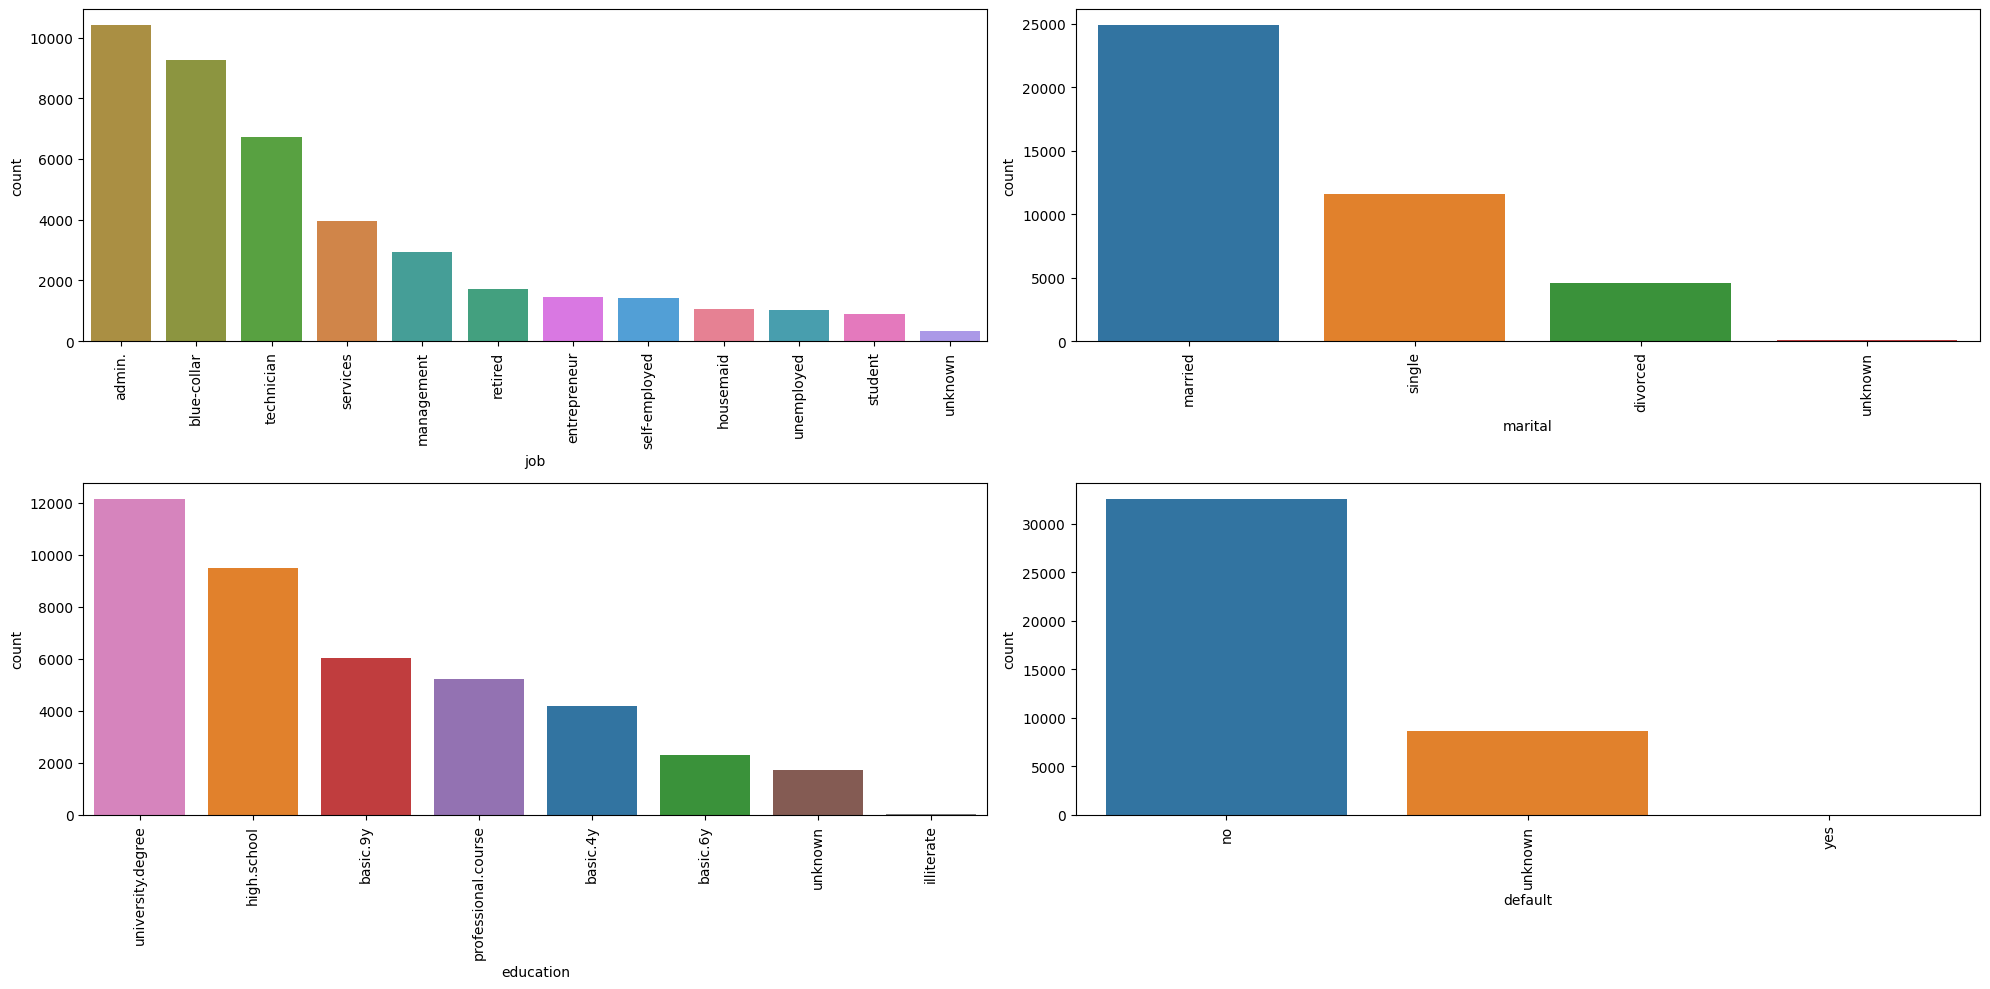

/tmp/ipykernel_2880/2711327413.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation=90)
/tmp/ipykernel_2880/2711327413.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 1].set_xticklabels(axs[0, 1].get_xticklabels(), rotation=90)
/tmp/ipykernel_2880/2711327413.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1, 0].set_xticklabels(axs[1, 0].get_xticklabels(), rotation=90)
/tmp/ipykernel_2880/2711327413.py:71: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=90)


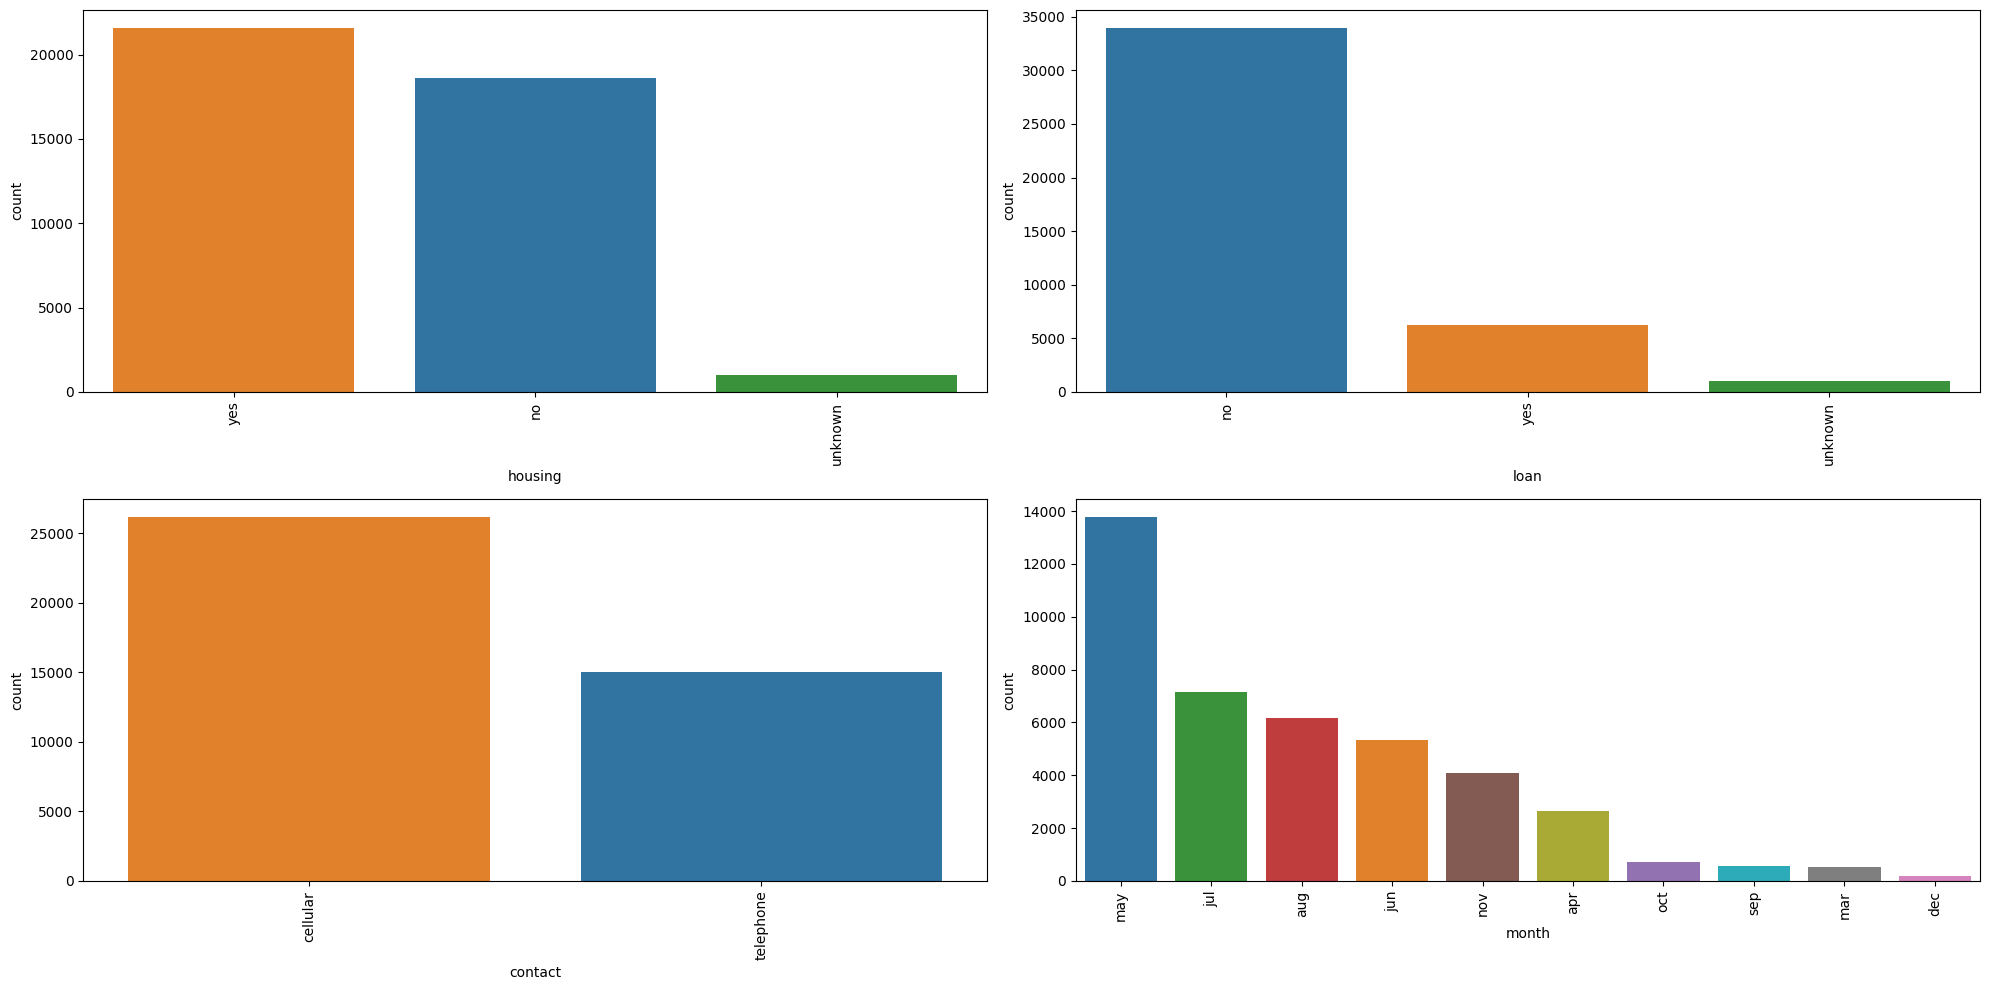

/tmp/ipykernel_2880/2711327413.py:81: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation=90)
/tmp/ipykernel_2880/2711327413.py:89: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 1].set_xticklabels(axs[0, 1].get_xticklabels(), rotation=90)
/tmp/ipykernel_2880/2711327413.py:97: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1, 0].set_xticklabels(axs[1, 0].get_xticklabels(), rotation=90)


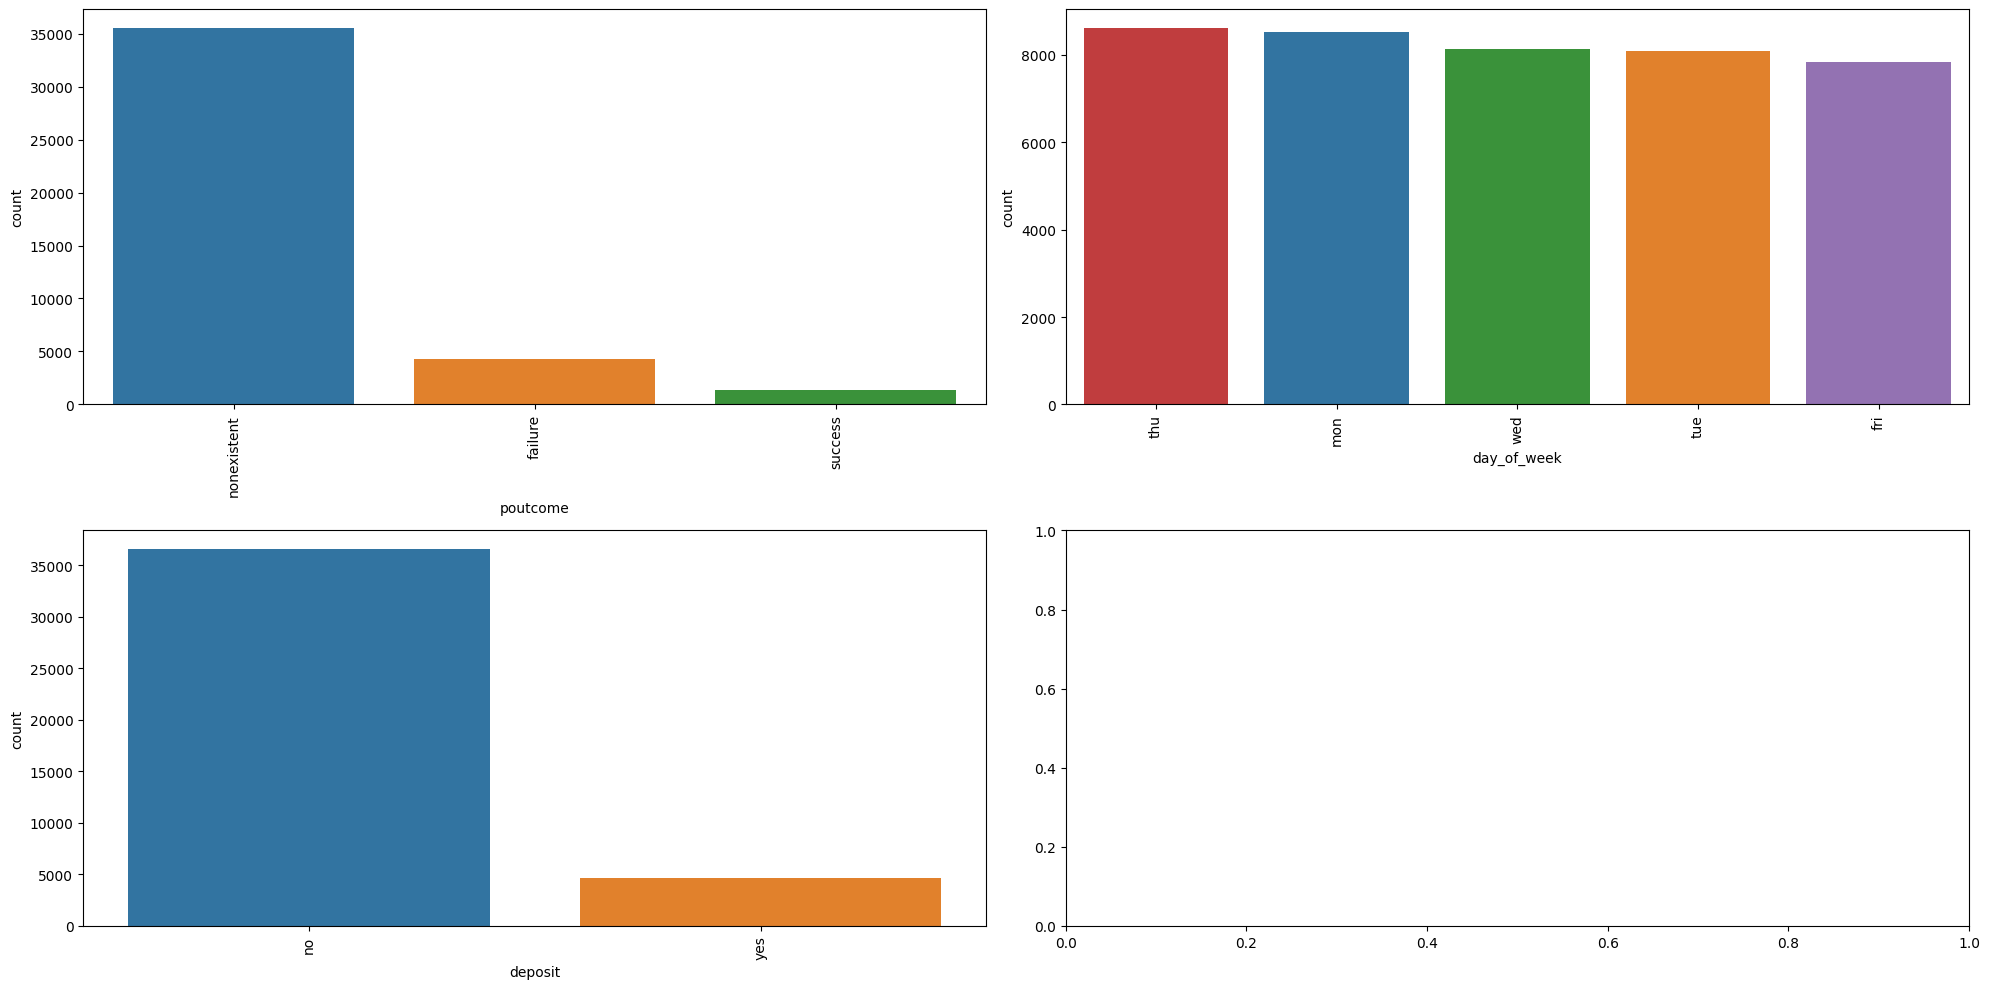

In [11]:
#VARIABLES CATEGÓRICAS.
import matplotlib.pyplot as plt
import seaborn as sns
#graficaremos de 4 en 4
#1grupo: job marital education default
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
sns.countplot(ax=axs[0, 0],
              data=df_rd,
              x="job",
              hue="job",
              order=df_rd['job'].sort_values().value_counts().index)
axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation=90)


sns.countplot(ax=axs[0, 1],
              data=df_rd,
              x="marital",
              hue="marital",
              order=df_rd['marital'].sort_values().value_counts().index)
axs[0, 1].set_xticklabels(axs[0, 1].get_xticklabels(), rotation=90)


sns.countplot(ax=axs[1, 0],
              data=df_rd,
              x="education",
              hue="education",
              order=df_rd['education'].sort_values().value_counts().index)
axs[1, 0].set_xticklabels(axs[1, 0].get_xticklabels(), rotation=90)


sns.countplot(ax=axs[1, 1],
              data=df_rd,
              x="default",
              hue="default",
              order=df_rd['default'].sort_values().value_counts().index)
axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

#grupo: housing loan contact month
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
sns.countplot(ax=axs[0, 0],
              data=df_rd,
              x="housing",
              hue="housing",
              order=df_rd['housing'].sort_values().value_counts().index)
axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation=90)


sns.countplot(ax=axs[0, 1],
              data=df_rd,
              x="loan",
              hue="loan",
              order=df_rd['loan'].sort_values().value_counts().index)
axs[0, 1].set_xticklabels(axs[0, 1].get_xticklabels(), rotation=90)


sns.countplot(ax=axs[1, 0],
              data=df_rd,
              x="contact",
              hue="contact",
              order=df_rd['contact'].sort_values().value_counts().index)
axs[1, 0].set_xticklabels(axs[1, 0].get_xticklabels(), rotation=90)


sns.countplot(ax=axs[1, 1],
              data=df_rd,
              x="month",
              hue="month",
              order=df_rd['month'].sort_values().value_counts().index)
axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()
#3grupo poutcome day_of_week  deposit
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
sns.countplot(ax=axs[0, 0],
              data=df_rd,
              x="poutcome",
              hue="poutcome",
              order=df_rd['poutcome'].sort_values().value_counts().index)
axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation=90)


sns.countplot(ax=axs[0, 1],
              data=df_rd,
              x="day_of_week",
              hue="day_of_week",
              order=df_rd['day_of_week'].sort_values().value_counts().index)
axs[0, 1].set_xticklabels(axs[0, 1].get_xticklabels(), rotation=90)


sns.countplot(ax=axs[1, 0],
              data=df_rd,
              x="deposit",
              hue="deposit",
              order=df_rd['deposit'].sort_values().value_counts().index)
axs[1, 0].set_xticklabels(axs[1, 0].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()


In [12]:
print(df_rd_vars[df_rd_vars['Tipo'] == 'Categórica']['Columna'].unique())

['job' 'marital' 'education' 'default' 'housing' 'loan' 'contact' 'month'
 'day_of_week' 'poutcome' 'deposit']


PRIMERO DE TODO TRADUCIMOS LAS VARIABLES CATEGORICAS AL ESPAÑOL:
    'job': 'trabajo',
    'marital': 'estado_civil',
    'education': 'educacion',
    'default': 'impago',
    'housing': 'vivienda',
    'loan': 'prestamo',
    'contact': 'contacto',
    'month': 'mes',
    'day_of_week': 'dia_semana',
    'poutcome': 'resultado_anterior',
    'y': 'variable_objetivo'  (true o false) personas con cuenta de ahorros/depositos a largo plazo.
CONCLUSIONES: Estos son los datos de los clientes dados de alta, la variable month  es mas relevante que  day_of_week la cual su distribucion se mantiene homogenea durante todos los dias de la semana.
puedo observar una distribucion pareja en muchas de las variables, incluido patrones similares con la variable target. A priori mantendre todas la variables,
hasta observar la correlacion multivariable, pero estoy convencido de que mas de 1 variable dan informacion redundante, por lo que en nuestra clasificacion,
podremos obviarlas para el calculo en los modelos.


In [13]:
#2.2) VARIABLES UNIVARIADAS NUMERICAS.
print(df_rd_vars[df_rd_vars['Tipo'] == 'Numérica']['Columna'].unique())
#Preparo los datos para graficar:
maxage= df_rd['age'].max()
maxdur= df_rd['duration'].max()
maxcam= df_rd['campaign'].max()
maxpday= df_rd['pdays'].max()
maxprev= df_rd['previous'].max()
maxconspr= df_rd['cons.price.idx'].max()
maxcons= df_rd['cons.conf.idx'].max()
maxeur= df_rd['euribor3m'].max()
maxemp= df_rd['nr.employed'].max()

['age' 'duration' 'campaign' 'pdays' 'previous' 'emp.var.rate'
 'cons.price.idx' 'cons.conf.idx' 'euribor3m' 'nr.employed']


/tmp/ipykernel_2880/2863953673.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation=90)
/tmp/ipykernel_2880/2863953673.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation=90)
/tmp/ipykernel_2880/2863953673.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 1].set_xticklabels(axs[0, 1].get_xticklabels(), rotation=90)
/tmp/ipykernel_2880/2863953673.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=90)


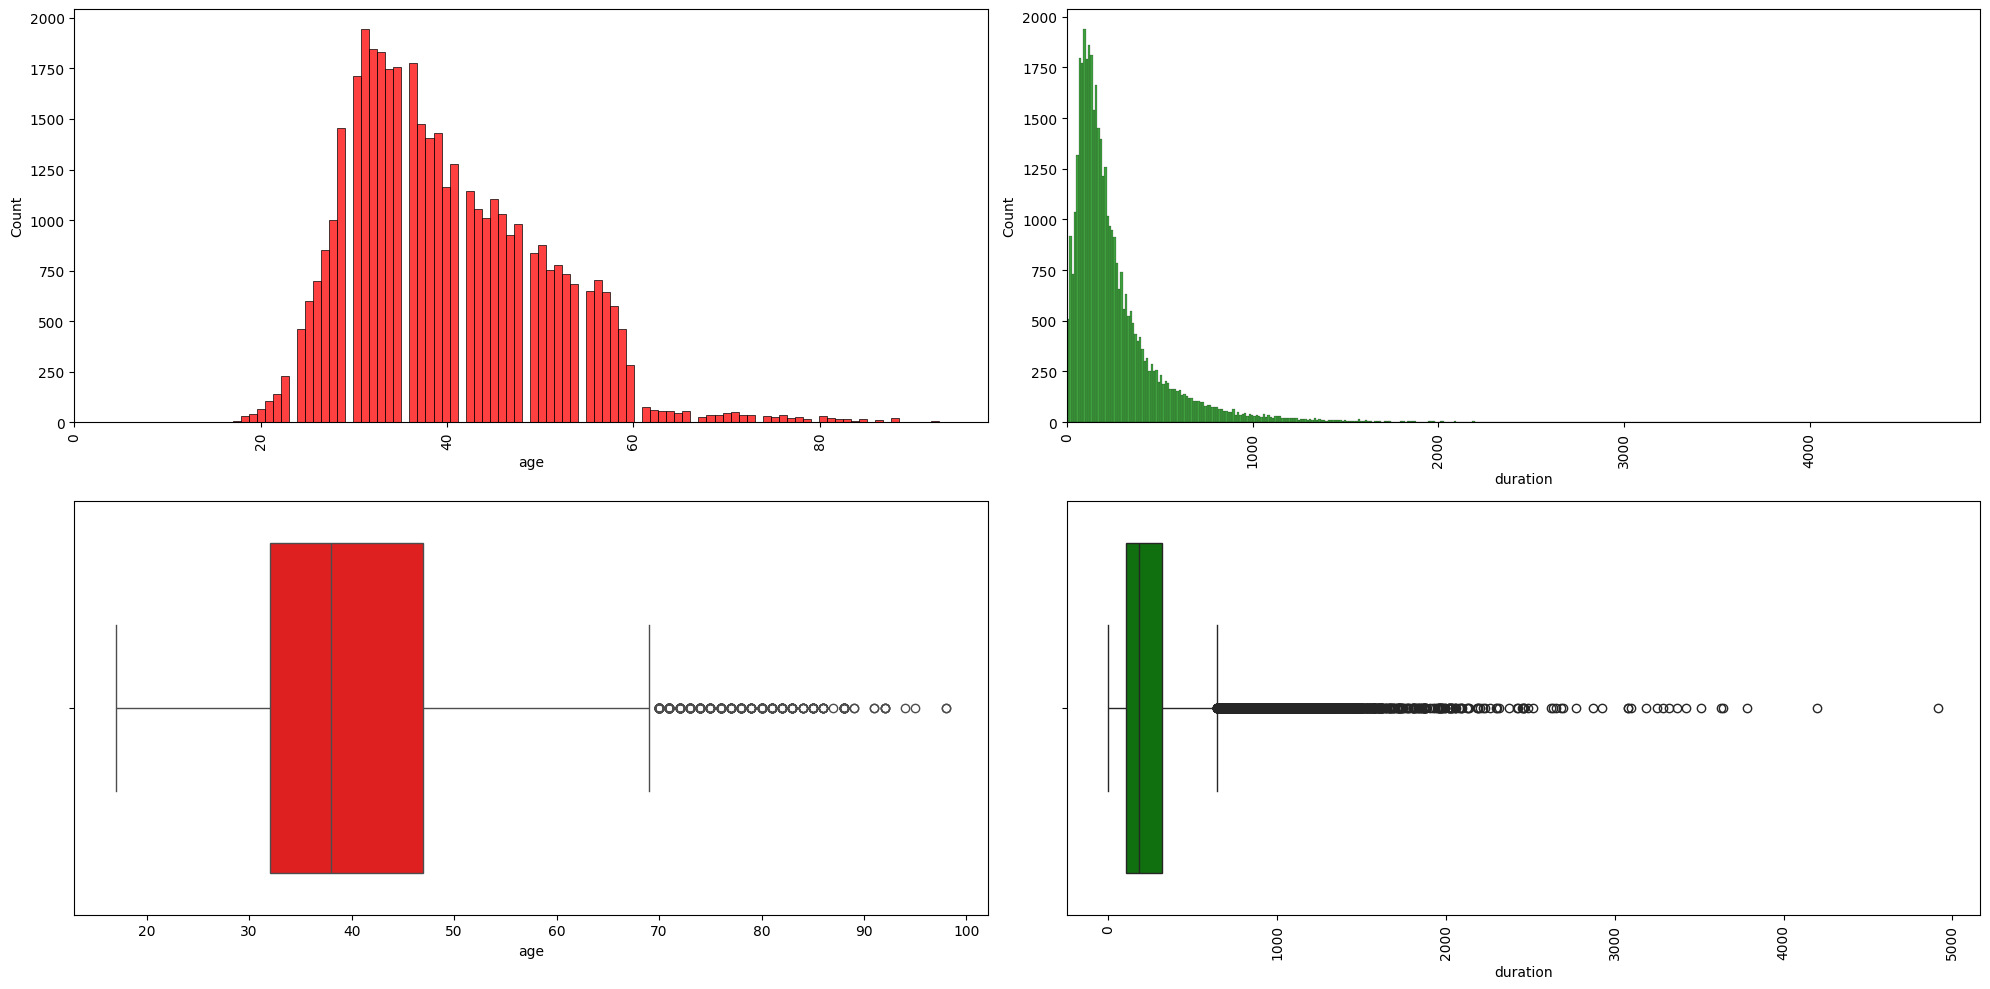

/tmp/ipykernel_2880/2863953673.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation=90)
/tmp/ipykernel_2880/2863953673.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation=90)
/tmp/ipykernel_2880/2863953673.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 1].set_xticklabels(axs[0, 1].get_xticklabels(), rotation=90)
/tmp/ipykernel_2880/2863953673.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=90)


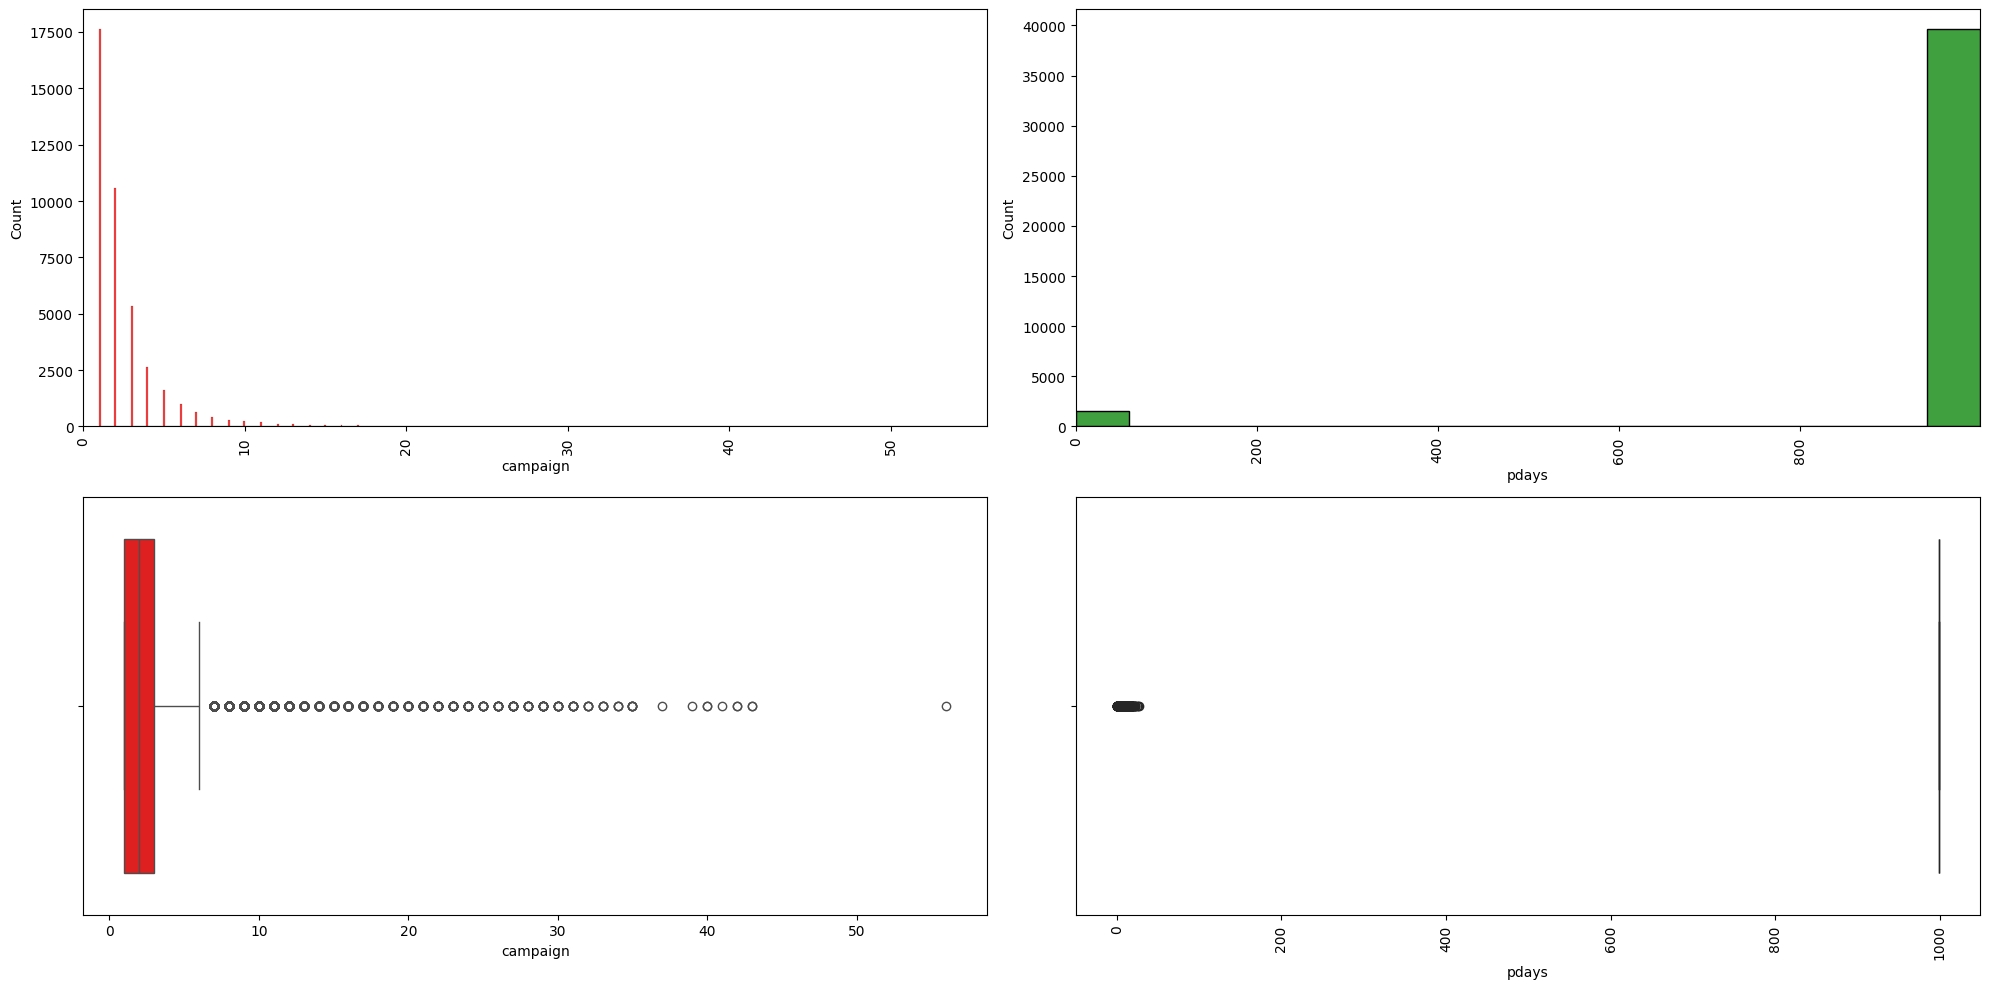

/tmp/ipykernel_2880/2863953673.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation=90)
/tmp/ipykernel_2880/2863953673.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation=90)
/tmp/ipykernel_2880/2863953673.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 1].set_xticklabels(axs[0, 1].get_xticklabels(), rotation=90)
/tmp/ipykernel_2880/2863953673.py:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=90)


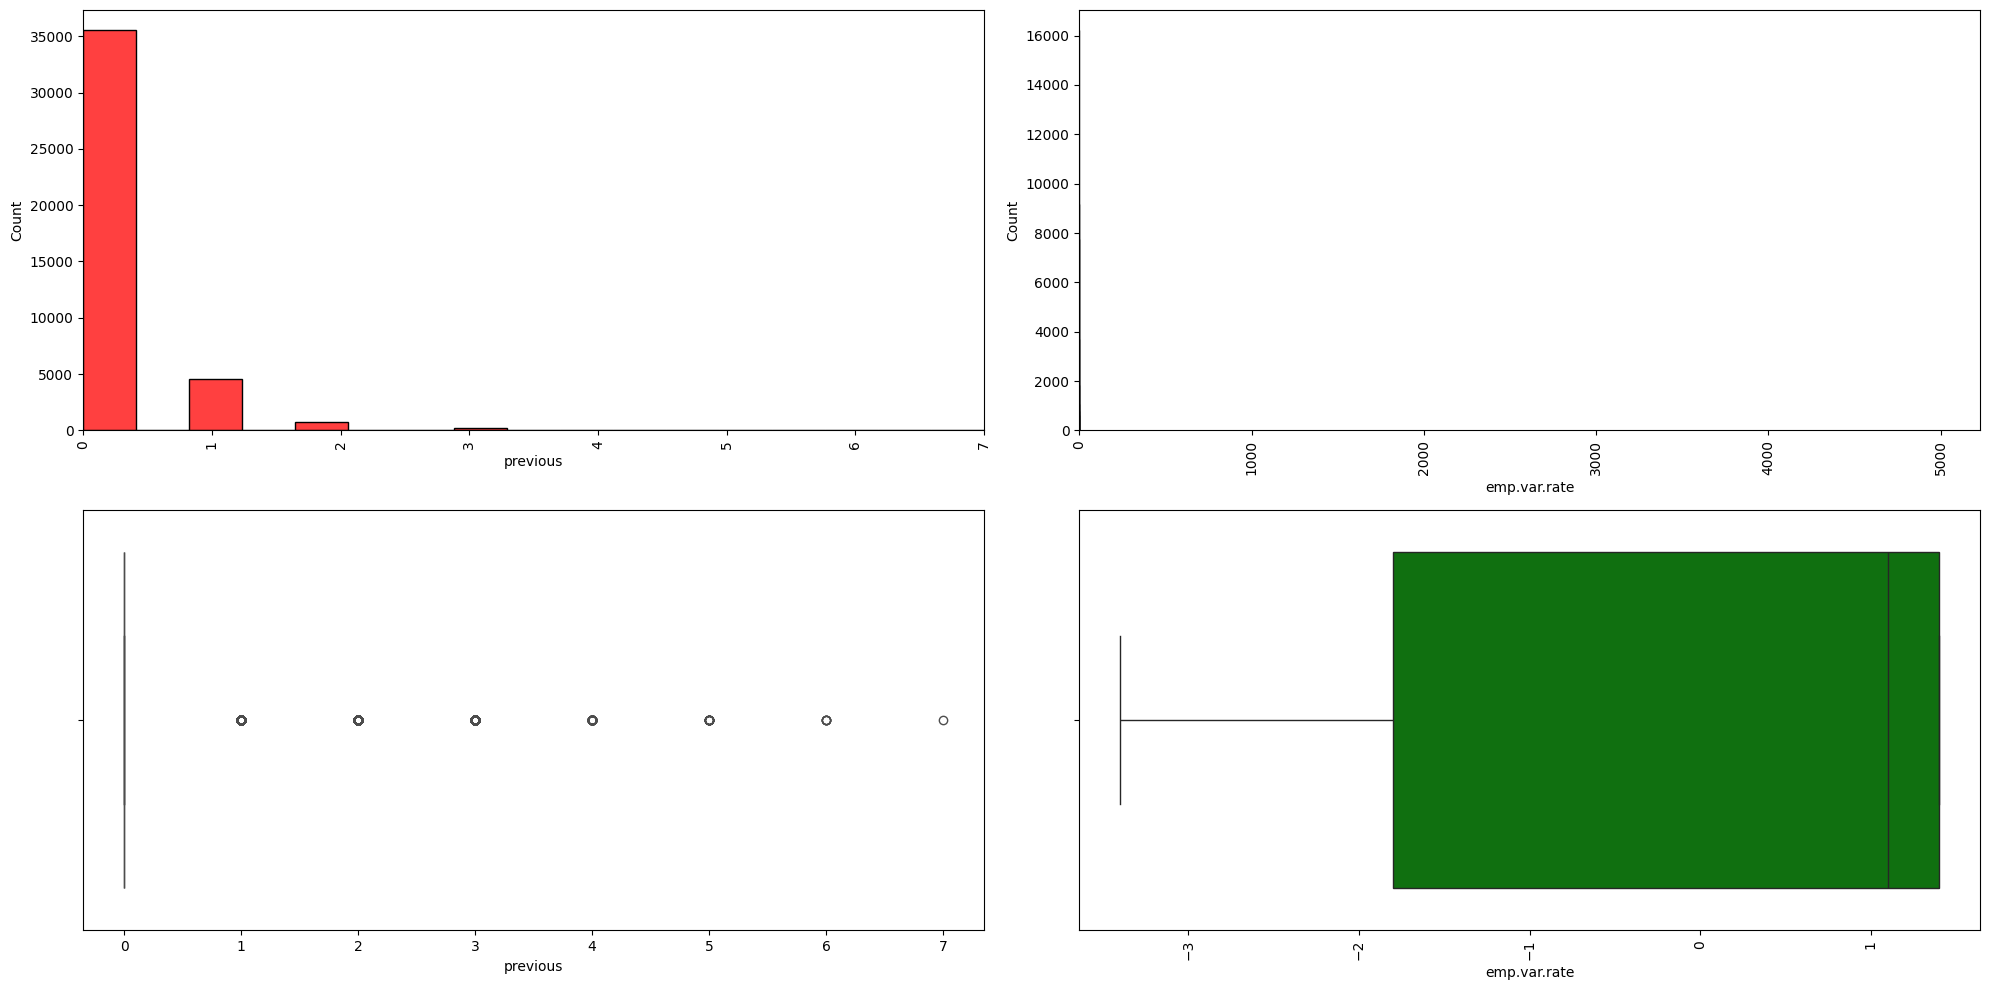

/tmp/ipykernel_2880/2863953673.py:67: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation=90)
/tmp/ipykernel_2880/2863953673.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation=90)
/tmp/ipykernel_2880/2863953673.py:75: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 1].set_xticklabels(axs[0, 1].get_xticklabels(), rotation=90)
/tmp/ipykernel_2880/2863953673.py:78: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=90)


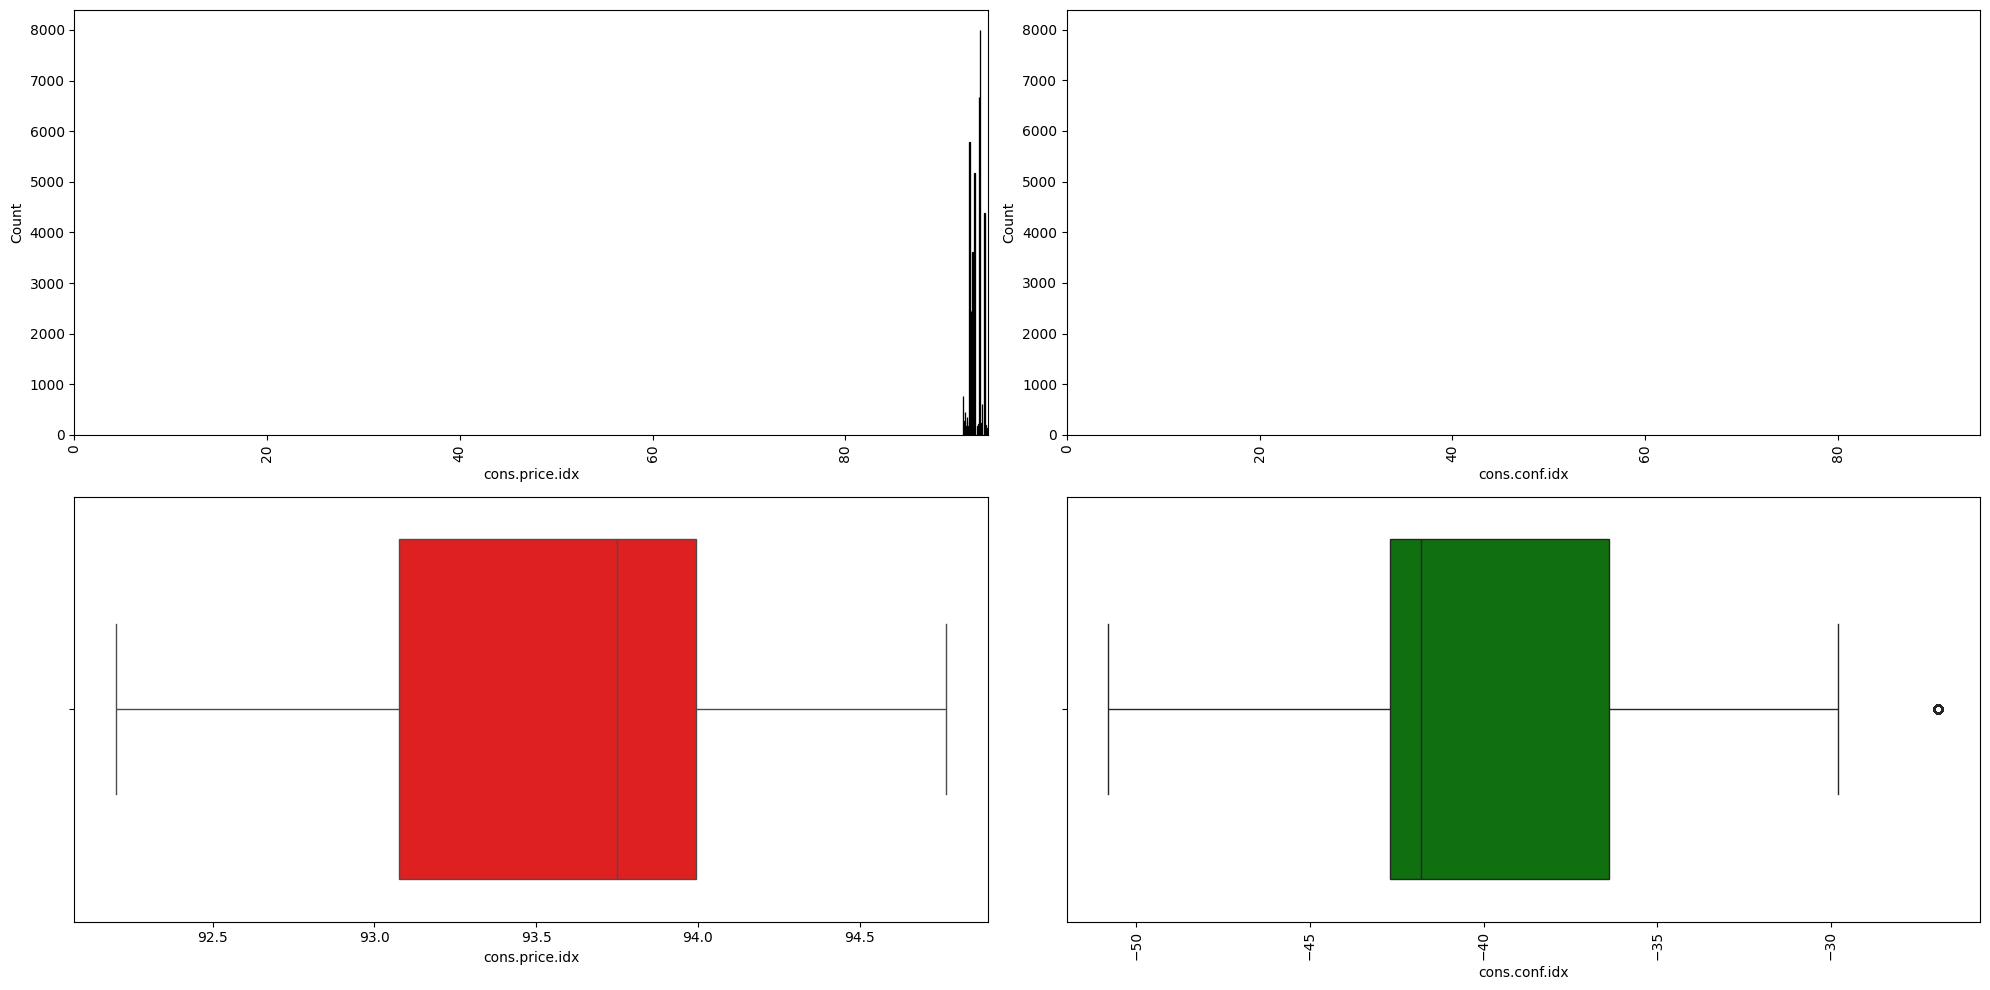

In [14]:
#2.2) VARIABLES UNIVARIADAS NUMERICAS. Gráficos.
#1grupo: 'age' 'duration' 
fig, axs = plt.subplots(2, 2, figsize=(20, 10))


sns.histplot(ax= axs[0,0], data=df_rd, x='age', color="red").set_xlim(0, maxage)
axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation=90)

sns.boxplot(ax=axs[1,0], data=df_rd, x='age',color="red")
axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation=90)

########

sns.histplot(ax= axs[0,1], data=df_rd, x='duration',color="green").set_xlim(0, maxdur)
axs[0, 1].set_xticklabels(axs[0, 1].get_xticklabels(), rotation=90)

sns.boxplot(ax=axs[1,1], data=df_rd, x='duration',color="green")
axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

#2grupo 'campaign' 'pdays'
fig, axs = plt.subplots(2, 2, figsize=(20, 10))


sns.histplot(ax= axs[0,0], data=df_rd, x='campaign', color="red").set_xlim(0, maxcam)
axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation=90)

sns.boxplot(ax=axs[1,0], data=df_rd, x='campaign',color="red")
axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation=90)

########

sns.histplot(ax= axs[0,1], data=df_rd, x='pdays',color="green").set_xlim(0, maxpday)
axs[0, 1].set_xticklabels(axs[0, 1].get_xticklabels(), rotation=90)

sns.boxplot(ax=axs[1,1], data=df_rd, x='pdays',color="green")
axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

#3grupo 'previous' 'emp.var.rate'
fig, axs = plt.subplots(2, 2, figsize=(20, 10))


sns.histplot(ax= axs[0,0], data=df_rd, x='previous', color="red").set_xlim(0, maxprev)
axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation=90)

sns.boxplot(ax=axs[1,0], data=df_rd, x='previous',color="red")
axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation=90)

########

sns.histplot(ax= axs[0,1], data=df_rd, x='emp.var.rate',color="green").set_xlim(0, maxemp)
axs[0, 1].set_xticklabels(axs[0, 1].get_xticklabels(), rotation=90)

sns.boxplot(ax=axs[1,1], data=df_rd, x='emp.var.rate',color="green")
axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

#4grupo 'cons.price.idx' 'cons.conf.idx'
fig, axs = plt.subplots(2, 2, figsize=(20, 10))


sns.histplot(ax= axs[0,0], data=df_rd, x='cons.price.idx', color="red").set_xlim(0, maxconspr)
axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation=90)

sns.boxplot(ax=axs[1,0], data=df_rd, x='cons.price.idx',color="red")
axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation=90)

########

sns.histplot(ax= axs[0,1], data=df_rd, x='cons.conf.idx',color="green").set_xlim(0, maxconspr)
axs[0, 1].set_xticklabels(axs[0, 1].get_xticklabels(), rotation=90)

sns.boxplot(ax=axs[1,1], data=df_rd, x='cons.conf.idx',color="green")
axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()


2.2)CONCLUSIONES ANÁLISIS UNIVARIABLE. VARIABLES NUMÉRICAS:
En muchas de las variables existen outliers que distorsionan la distribucion de los datos, aun asi puedo observar que hay conjuntos de variables que trazan una distribucion similar entre ellas,
puediendo destacar distrbuciones asimetricas en ambos lados del rango de valor de Y, ademas de un par de variables distrbuidas simetricamente.
Veremos como afecta a la linealidad intervariable, tras la eliminacion de outliers, en el caso que la cantidad de muestras fuera de los rangos cuartilicos sea infima.

PASO 3: ANALISIS MULTIVARIABLES: 
3.1) ANÁLISIS Categóricas-Categóricas

In [15]:
print(df_rd_vars)

                Tipo         Columna
0           Numérica             age
1           Numérica        duration
2           Numérica        campaign
3           Numérica           pdays
4           Numérica        previous
5           Numérica    emp.var.rate
6           Numérica  cons.price.idx
7           Numérica   cons.conf.idx
8           Numérica       euribor3m
9           Numérica     nr.employed
10        Categórica             job
11        Categórica         marital
12        Categórica       education
13        Categórica         default
14        Categórica         housing
15        Categórica            loan
16        Categórica         contact
17        Categórica           month
18        Categórica     day_of_week
19        Categórica        poutcome
20        Categórica         deposit
21    Total Numérico              10
22  Total Categórico              11
23     Total General              21


In [16]:
#PASO 3.1) ANÁLISIS MULTIVARIALE: NUM-CAT
#Antes de realizar un análisis exhaustivo entre variables voy a mencionar que el estudio de variables numericas-numericas, categoricas-categoricas, y numericas-categóricas
# Se puede englobar en un solo paso gracias a la factorización de variables categoricas por un numero entero,
# Este numero es una lista de enteros, donde se le asigna un valor a cada valor unico de la columna por orden de aparicion en los rows del dataframe.
# Solo realizare exclusivamente la observacion en las variables categoricas categoricas.
#Tras esto realizare la factorizacion y hare un análisis Numerico Numerico global.
# en el eje X subdividiremos las muestras en funcion de nuestra variable target 'deposit' categorica creando dos subgrupos de barras.

print(df_rd_vars[df_rd_vars['Tipo'] == 'Categórica']['Columna'].unique())

['job' 'marital' 'education' 'default' 'housing' 'loan' 'contact' 'month'
 'day_of_week' 'poutcome' 'deposit']


In [17]:
#3.1) SE GUARDARAN TODAS LAS VARIABLES FACTORIZADAS EN UN DICCIONARIO, ADEMAS SE LES CAMBIARA EL NOMBRE A LAS VARIABLES PARA IDENTIFICAR CUAL HA SIDO FACTORIZADA con la terminacion '_fc'.
import pandas as pd
import json
import os
from sklearn.preprocessing import LabelEncoder
def JsonFCZRename(df, categorical_cols, output_dir, suffix="_fc"):
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        mapping_dict = {value: str(index) for value, index in zip(le.classes_, le.transform(le.classes_))}
        print(f"Column: {col}")
        print(mapping_dict)
        filename = f"{col}_factors.json"
        filepath = os.path.join(output_dir, filename)
        with open(filepath, 'w') as f:
            json.dump(mapping_dict, f, indent=4)
        df.rename(columns={col: col + suffix}, inplace=True)

    return df
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'deposit']
JsonFCZRename(df_rd, categorical_cols, '/workspaces/EDA_ML.LogisticRegresion/data/processed/')



Column: job
{'admin.': '0', 'blue-collar': '1', 'entrepreneur': '2', 'housemaid': '3', 'management': '4', 'retired': '5', 'self-employed': '6', 'services': '7', 'student': '8', 'technician': '9', 'unemployed': '10', 'unknown': '11'}
Column: marital
{'divorced': '0', 'married': '1', 'single': '2', 'unknown': '3'}
Column: education
{'basic.4y': '0', 'basic.6y': '1', 'basic.9y': '2', 'high.school': '3', 'illiterate': '4', 'professional.course': '5', 'university.degree': '6', 'unknown': '7'}
Column: default
{'no': '0', 'unknown': '1', 'yes': '2'}
Column: housing
{'no': '0', 'unknown': '1', 'yes': '2'}
Column: loan
{'no': '0', 'unknown': '1', 'yes': '2'}
Column: contact
{'cellular': '0', 'telephone': '1'}
Column: month
{'apr': '0', 'aug': '1', 'dec': '2', 'jul': '3', 'jun': '4', 'mar': '5', 'may': '6', 'nov': '7', 'oct': '8', 'sep': '9'}
Column: day_of_week
{'fri': '0', 'mon': '1', 'thu': '2', 'tue': '3', 'wed': '4'}
Column: poutcome
{'failure': '0', 'nonexistent': '1', 'success': '2'}
Colu

,age,job_fc,marital_fc,education_fc,default_fc,housing_fc,loan_fc,contact_fc,month_fc,day_of_week_fc,...,campaign,pdays,previous,poutcome_fc,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit_fc
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,73,5,1,5,0,2,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41172,46,1,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41173,56,5,1,6,0,2,0,0,7,0,...,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41174,44,9,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


In [18]:
def vartype(df):


    num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    cat_cols = df.select_dtypes(include=['object']).columns.tolist()

    
    df_tipos = pd.DataFrame({'Tipo': ['Numérica']*len(num_cols) + ['Categórica']*len(cat_cols),
                            'Columna': num_cols + cat_cols})
    total_num = len(num_cols)
    total_cat = len(cat_cols)
    total_general = total_num + total_cat
    # Crear una lista de diccionarios para las nuevas filas
    new_rows = [
        {'Tipo': 'Total Numérico', 'Columna': total_num},
        {'Tipo': 'Total Categórico', 'Columna': total_cat},
        {'Tipo': 'Total General', 'Columna': total_general},
    ]

    
    df_tipos = pd.concat([df_tipos, pd.DataFrame(new_rows)], ignore_index=True)
    
    return df_tipos
df_rd_var_fc=vartype(df_rd)

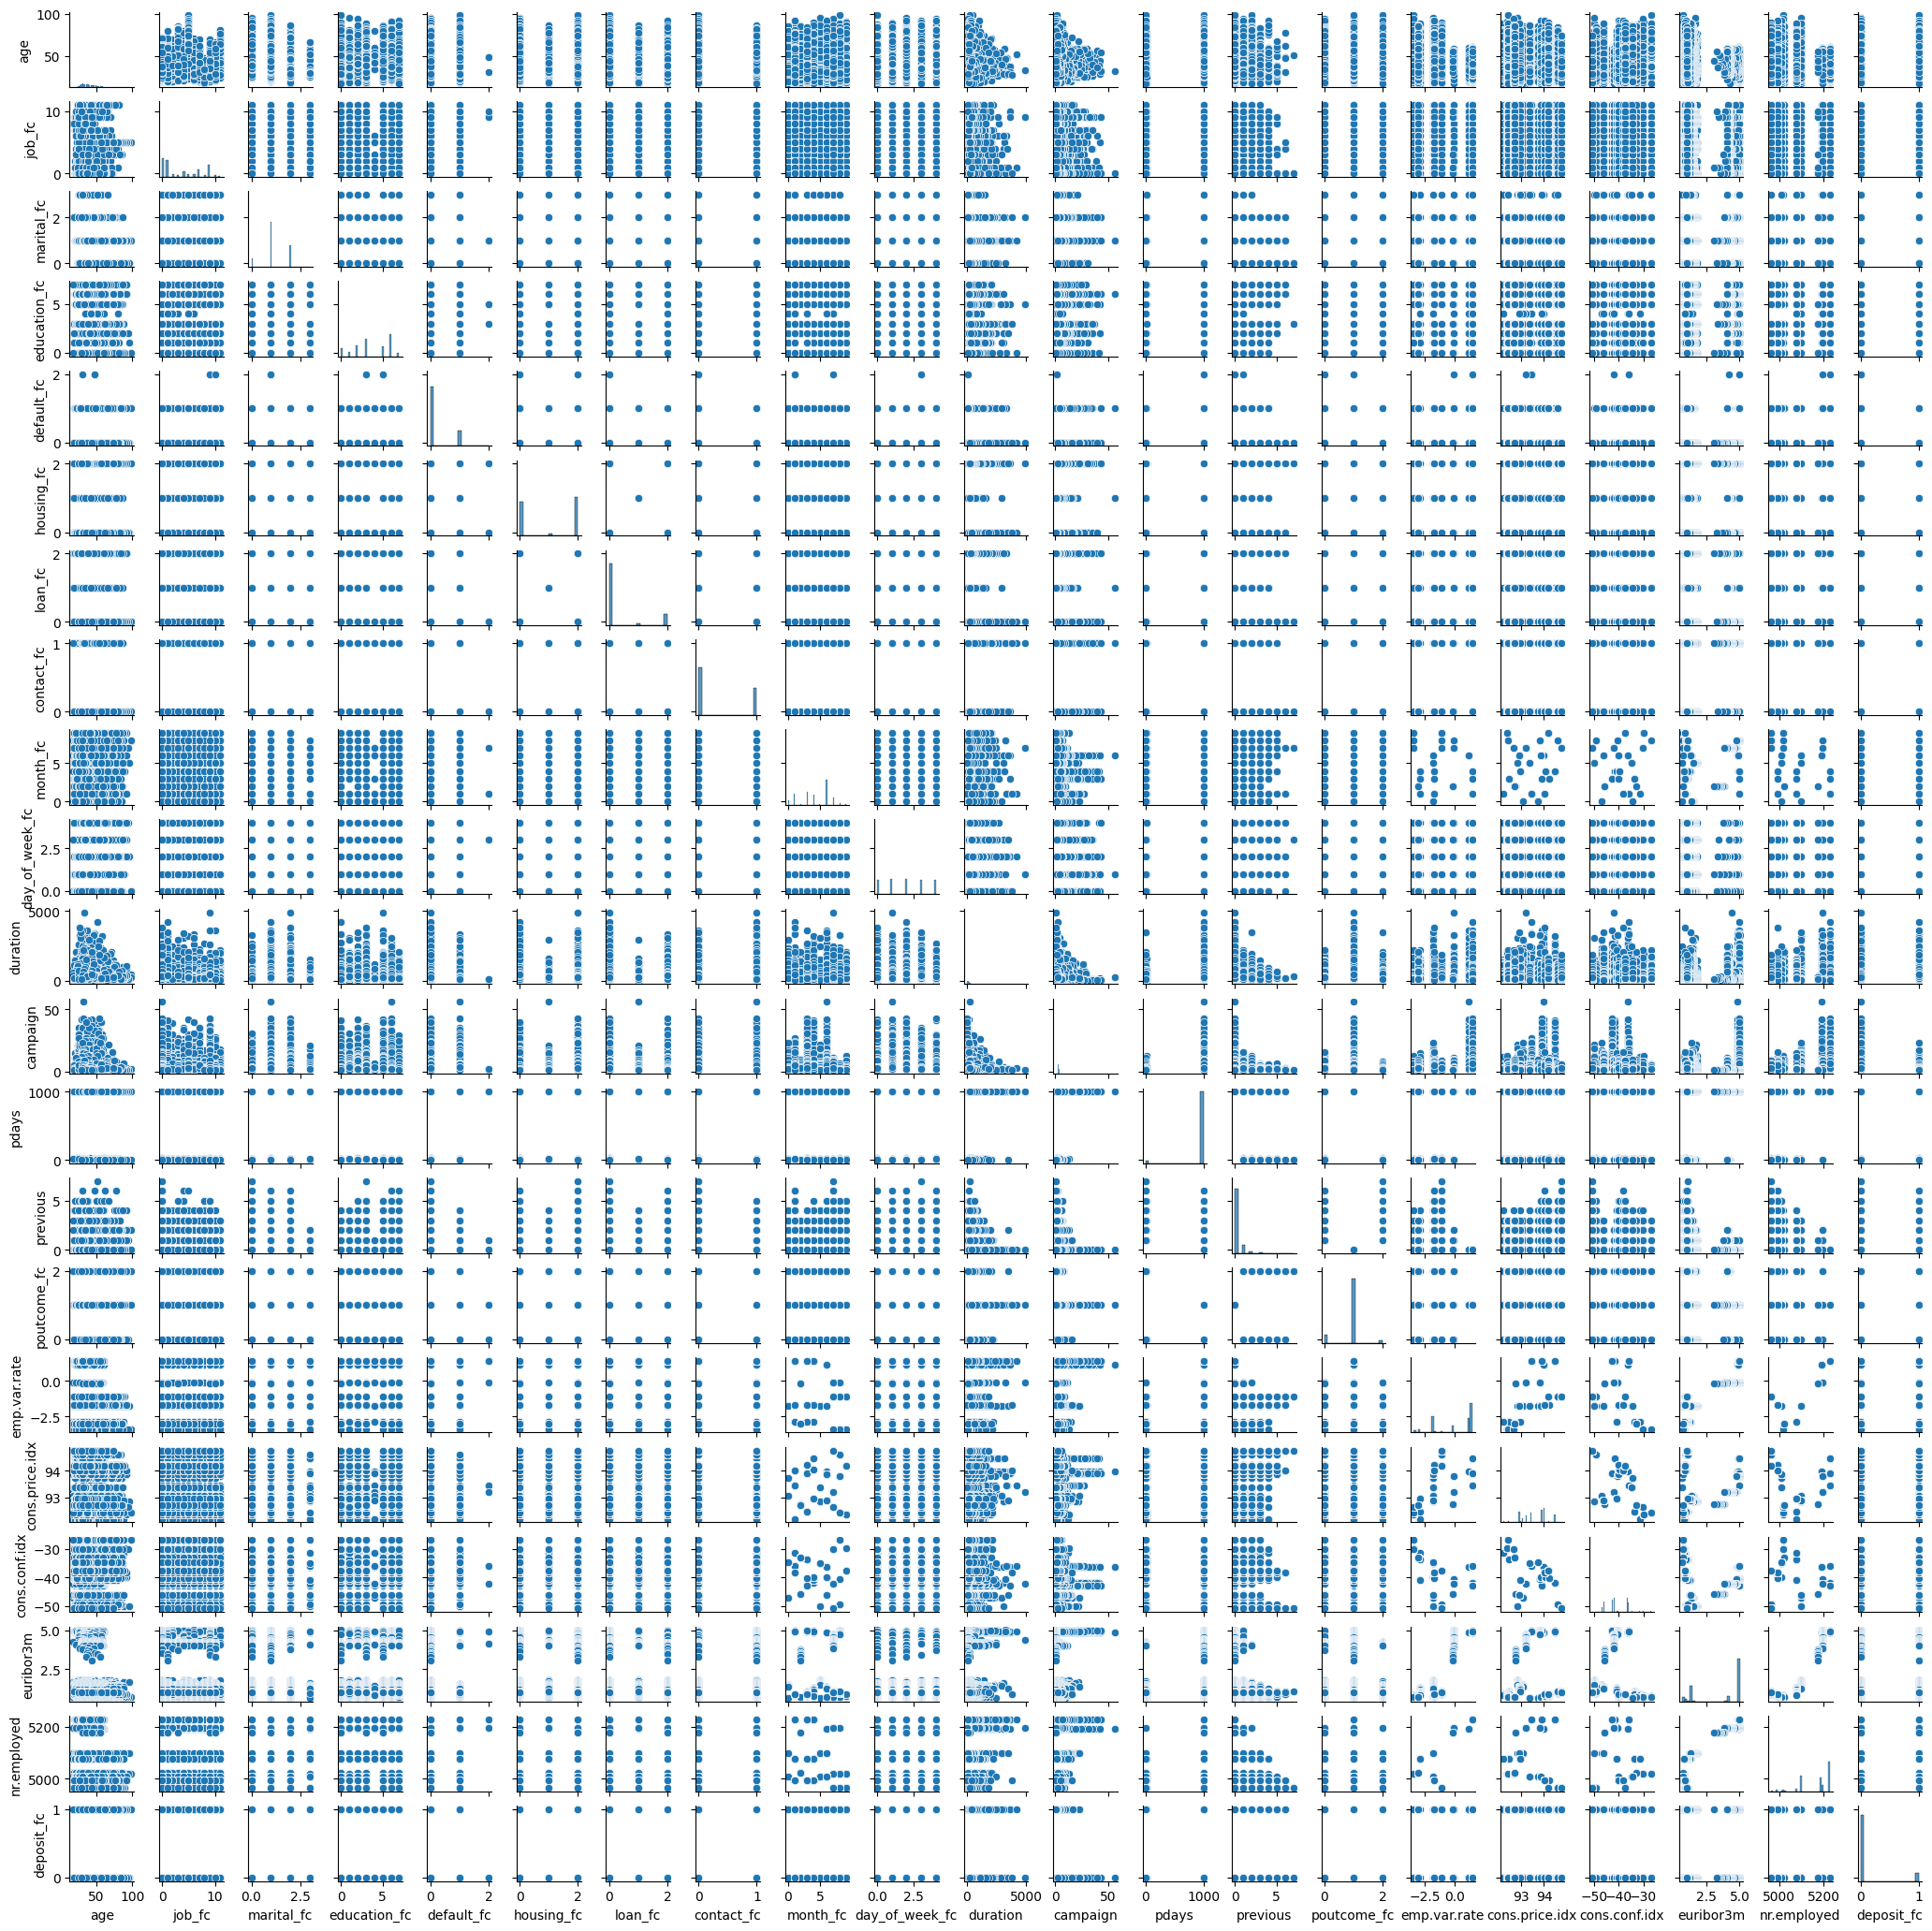

In [19]:
#3.2)Analisis multivariable Global (NUM-NUM_FC(Categoricas factorizadas))
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data=df_rd, height=1, aspect=1)

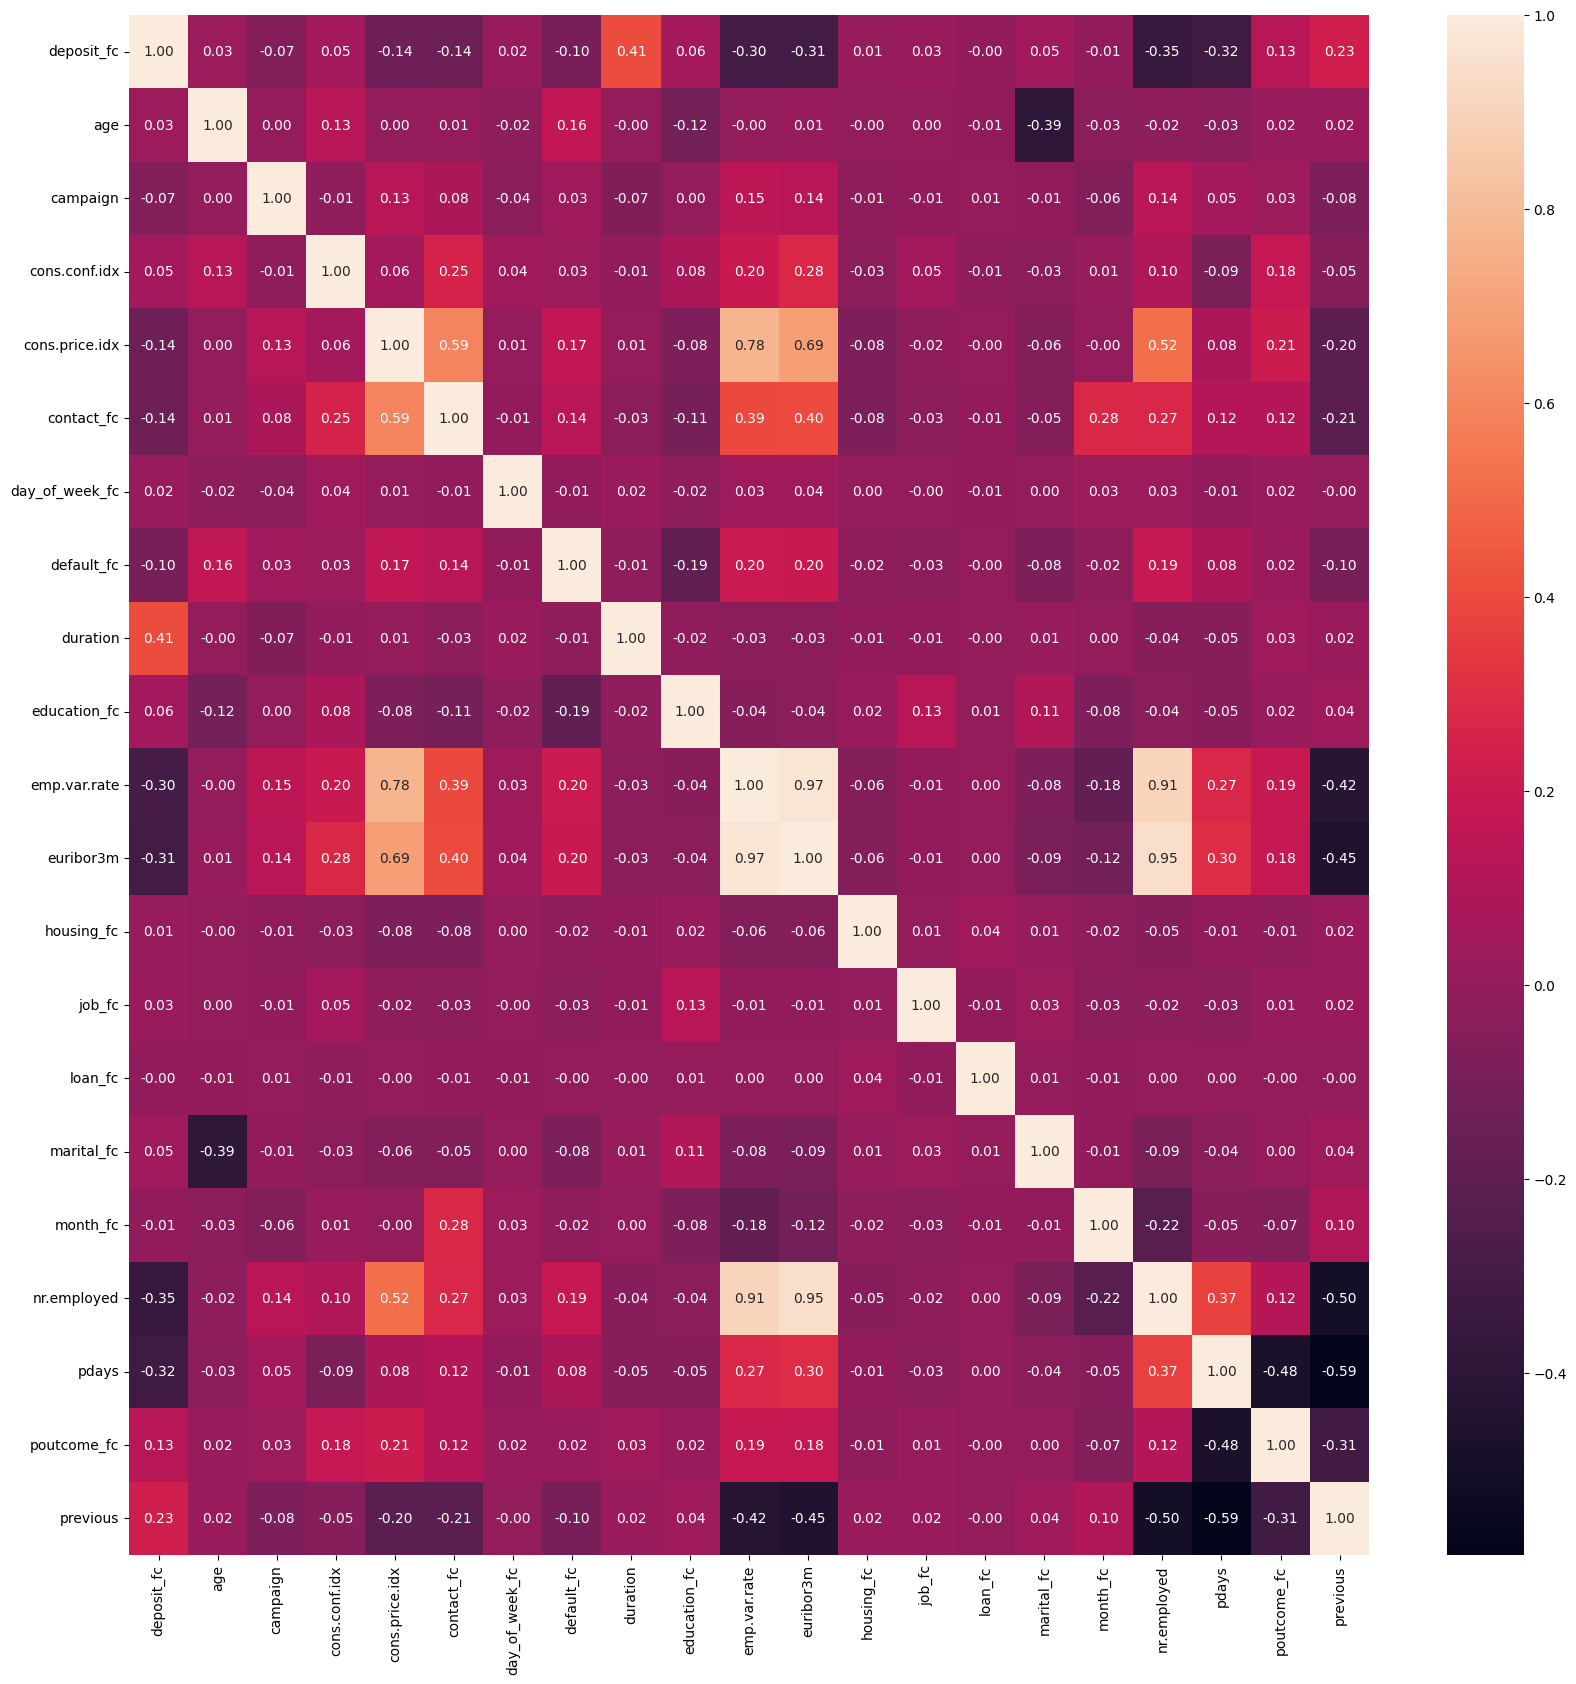

In [20]:
#3.3) MAPA DE CALOR GLOBAL, MATRIZ DE CONFUSION.
#Primero de todo vamos a centrar nuestra var target en la diagonal de la matriz.
target_var = "deposit_fc"  
df_heatmap = df_rd.reindex(columns=[target_var] + list(df_rd.columns.difference([target_var])))
#Ahora representamos el grafico.
plt.figure(figsize=(20, 20))
sns.heatmap(df_heatmap.corr(), annot=True, fmt=".2f")
plt.show()

Conclusiones del mapa de calor:
Nuestra variable target, desgraciadamente tiene correlaciones tanto positivas como negativas.
En el sentido positivo tiene una gran correlacion con "duration"(num 0.41), con previous(num 0.23), y con poutcome(cat fcz 0.13)
Como me han pedido solo hacer una clasificacion y hacer un modelo que funcione no necesito saber que es cada cosa y el porque.
Hay varias variables que tambien en algun punto de las muestras hacen que la opcion de tener un deposito no sea algo bueno, tienen una relacion negativa:
nr.employed(num -0.35, pdays -0.32, euribor3m -0.31, emp.var.rate -0.30)



PASO 4) FEATURE ENGINEERING.
4.1) VARIABLES A FUSIONAR/ELIMINAR.

A)'nr.employed+emp.var.rate'(0.91),'nr.employed+euribor3m'(0.95),'euribor3m+emp.var.rate'(0.97).
 HAY 4 VARIABLES QUE ENTRE ELLAS TIENE UNA CORRELACION CERCANA A 1, no voy a fusionarlas porque tienen una escala muy diferente.
 




In [21]:
print(df_rd_var_fc)

                Tipo         Columna
0           Numérica             age
1           Numérica          job_fc
2           Numérica      marital_fc
3           Numérica    education_fc
4           Numérica      default_fc
5           Numérica      housing_fc
6           Numérica         loan_fc
7           Numérica      contact_fc
8           Numérica        month_fc
9           Numérica  day_of_week_fc
10          Numérica        duration
11          Numérica        campaign
12          Numérica           pdays
13          Numérica        previous
14          Numérica     poutcome_fc
15          Numérica    emp.var.rate
16          Numérica  cons.price.idx
17          Numérica   cons.conf.idx
18          Numérica       euribor3m
19          Numérica     nr.employed
20          Numérica      deposit_fc
21    Total Numérico              21
22  Total Categórico               0
23     Total General              21


In [22]:
stats1=df_rd['nr.employed'].describe()
stats2=df_rd['euribor3m'].describe()
stats3=df_rd['emp.var.rate'].describe()
print(stats1,'\n',stats2,'\n',stats3)


count    41176.000000
mean      5167.034870
std         72.251364
min       4963.600000
25%       5099.100000
50%       5191.000000
75%       5228.100000
max       5228.100000
Name: nr.employed, dtype: float64 
 count    41176.000000
mean         3.621293
std          1.734437
min          0.634000
25%          1.344000
50%          4.857000
75%          4.961000
max          5.045000
Name: euribor3m, dtype: float64 
 count    41176.000000
mean         0.081922
std          1.570883
min         -3.400000
25%         -1.800000
50%          1.100000
75%          1.400000
max          1.400000
Name: emp.var.rate, dtype: float64


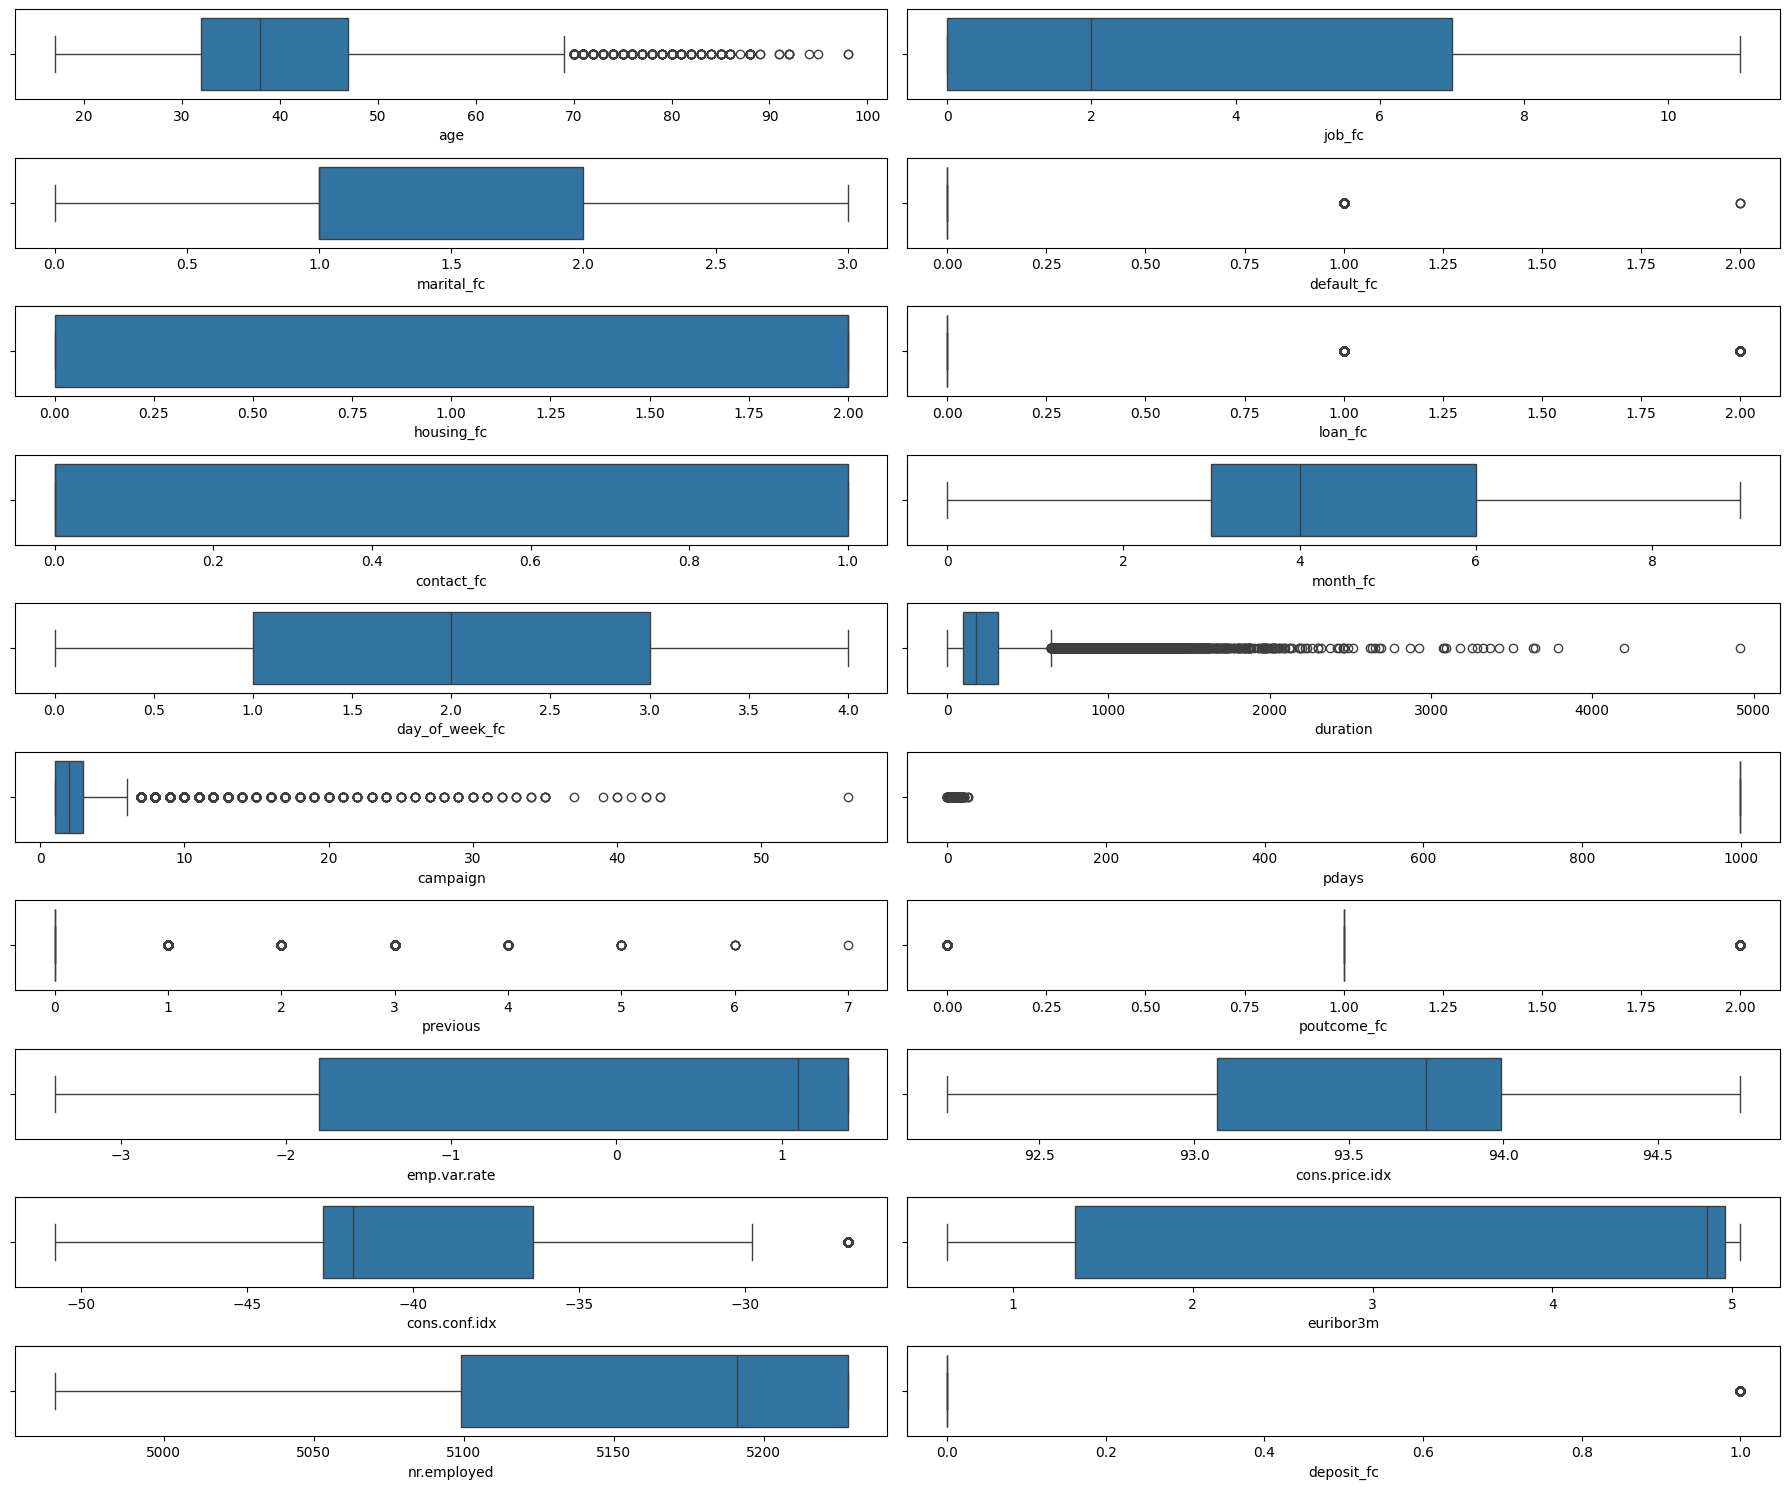

In [23]:
#PASO 4.2) ANÁLISIS DE LOS VALORES ATÍPICOS(OUTLIERS)
df_rd.describe()
#Para hacernos una idea de donde hay valores atípicos empezaremos por observar el describe de nuestras variables.
#Tras este paso empezaremos a graficar los graficos de caja que nos ayudaran a visualizar los outlier para cada variable relevante.
fig, ax = plt.subplots(10, 2, figsize=(18, 15))
sns.boxplot(ax = ax[0,0], data = df_rd, x='age')
sns.boxplot(ax = ax[0,1], data = df_rd, x='job_fc')
sns.boxplot(ax = ax[1,0], data = df_rd, x='marital_fc')
sns.boxplot(ax = ax[1,1], data = df_rd, x='default_fc')
sns.boxplot(ax = ax[2,0], data = df_rd, x='housing_fc')
sns.boxplot(ax = ax[2,1], data = df_rd, x='loan_fc')
sns.boxplot(ax = ax[3,0], data = df_rd, x='contact_fc')
sns.boxplot(ax = ax[3,1], data = df_rd, x='month_fc')
sns.boxplot(ax = ax[4,0], data = df_rd, x='day_of_week_fc')
sns.boxplot(ax = ax[4,1], data = df_rd, x='duration')
sns.boxplot(ax = ax[5,0], data = df_rd, x='campaign')
sns.boxplot(ax = ax[5,1], data = df_rd, x='pdays')
sns.boxplot(ax = ax[6,0], data = df_rd, x='previous')
sns.boxplot(ax = ax[6,1], data = df_rd, x='poutcome_fc')
sns.boxplot(ax = ax[7,0], data = df_rd, x='emp.var.rate')
sns.boxplot(ax = ax[7,1], data = df_rd, x='cons.price.idx')
sns.boxplot(ax = ax[8,0], data = df_rd, x='cons.conf.idx')
sns.boxplot(ax = ax[8,1], data = df_rd, x='euribor3m')
sns.boxplot(ax = ax[9,0], data = df_rd, x='nr.employed')
sns.boxplot(ax = ax[9,1], data = df_rd, x='deposit_fc')
plt.tight_layout()
plt.show()


In [24]:
#4.2)
#dataframe sin outliers.
df_rd_sol= df_rd.copy()
df_rd_sol.to_csv('/workspaces/EDA_ML.LogisticRegresion/data/processed/dataframes/df_rd_sol.csv')
#dataframe con outliers.
df_rd_col= df_rd.copy()
df_rd_col.to_csv('/workspaces/EDA_ML.LogisticRegresion/data/processed/dataframes/df_rd_col.csv')

In [ ]:
import pandas as pd
import json
#4.3) Eliminamos outliers para df_rd_sol \\sin outliers\\
def LimsOlSaveJson(df, columns, output_path):
    for column in columns:
        stats = df[column].describe()
        iqr = stats['75%'] - stats['25%']
        ul = stats['75%'] + (2 * iqr)
        ll = max(stats['25%'] - (2 * iqr), 0)
        limits = {"upper_limit": ul, "lower_limit": ll}
        file_path = f"{output_path}/limits_{column}.json"
        with open(file_path, "w") as f:
            json.dump(limits, f, indent=4)
        df[column] = df[column].apply(lambda x: ul if x > ul else ll if x < ll else x)
    return df
#hacemos una lista de todas las variables, como hemos factorizado todas las variables categoricas, todas deberian ser numericas.
num_vars= df_rd_sol.select_dtypes(include=np.number).columns.tolist()
LimsOlSaveJson(df_rd_sol, num_vars,'/workspaces/EDA_ML.LogisticRegresion/data/processed/OutliersLims')
df_rd_sol.describe()

,age,job_fc,marital_fc,education_fc,default_fc,housing_fc,loan_fc,contact_fc,month_fc,day_of_week_fc,...,campaign,pdays,previous,poutcome_fc,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit_fc
count,41176.000000,41176.000000,41176.000000,41176.000000,41176.0,41176.000000,41176.0,41176.000000,41176.000000,41176.000000,...,41176.000000,41176.0,41176.0,41176.0,41176.000000,41176.000000,41176.0,41176.000000,41176.000000,41176.0
mean,39.997159,3.724184,1.172746,3.746916,0.0,1.071789,0.0,0.365286,4.231033,2.004614,...,2.333908,999.0,0.0,1.0,0.759117,93.575720,0.0,3.621293,5167.034870,0.0
std,10.314490,3.594459,0.608905,2.136539,0.0,0.985305,0.0,0.481516,2.319973,1.397692,...,1.701373,0.0,0.0,0.0,0.651389,0.578839,0.0,1.734437,72.251364,0.0
min,17.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,1.000000,999.0,0.0,1.0,0.000000,92.201000,0.0,0.634000,4963.600000,0.0
25%,32.000000,0.000000,1.000000,2.000000,0.0,0.000000,0.0,0.000000,3.000000,1.000000,...,1.000000,999.0,0.0,1.0,0.000000,93.075000,0.0,1.344000,5099.100000,0.0
50%,38.000000,2.000000,1.000000,3.000000,0.0,2.000000,0.0,0.000000,4.000000,2.000000,...,2.000000,999.0,0.0,1.0,1.100000,93.749000,0.0,4.857000,5191.000000,0.0
75%,47.000000,7.000000,2.000000,6.000000,0.0,2.000000,0.0,1.000000,6.000000,3.000000,...,3.000000,999.0,0.0,1.0,1.400000,93.994000,0.0,4.961000,5228.100000,0.0
max,77.000000,11.000000,3.000000,7.000000,0.0,2.000000,0.0,1.000000,9.000000,4.000000,...,7.000000,999.0,0.0,1.0,1.400000,94.767000,0.0,5.045000,5228.100000,0.0


5) FEATURE ENGINEERING:

In [41]:
#5.1) FUNCION SPLIT TRAIN/TEST
import pandas as pd
from sklearn.model_selection import train_test_split
import os
def split_and_save_data(df, target_column, output_dir, test_size=0.25, random_state=42, filename_prefix=""):
  X = df.drop(columns=target_column)
  y = df[target_column]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
  train_dir = os.path.join(output_dir, "train")
  test_dir = os.path.join(output_dir, "test")
  os.makedirs(train_dir, exist_ok=True)
  os.makedirs(test_dir, exist_ok=True)
  X_train.to_csv(os.path.join(train_dir, f"{filename_prefix}_X_train.csv"), index=False)
  X_test.to_csv(os.path.join(test_dir, f"{filename_prefix}_X_test.csv"), index=False)
  y_train.to_csv(os.path.join(train_dir, f"{filename_prefix}_y_train.csv"), index=False)
  y_test.to_csv(os.path.join(test_dir, f"{filename_prefix}_y_test.csv"), index=False)
output_dir = '/workspaces/EDA_ML.LogisticRegresion/data/processed/dataframes'
target_column = 'deposit_fc'
split_and_save_data(df_rd_sol, target_column, output_dir, filename_prefix="sol")

